<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Подключаем необходимые библиотеки:

In [1]:
import warnings

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
warnings.filterwarnings('ignore') # игнорируем предупреждения

Считываем данные из файла:

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

Общая информация о датафрейме, статистические метрики и гистограммы распределений:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


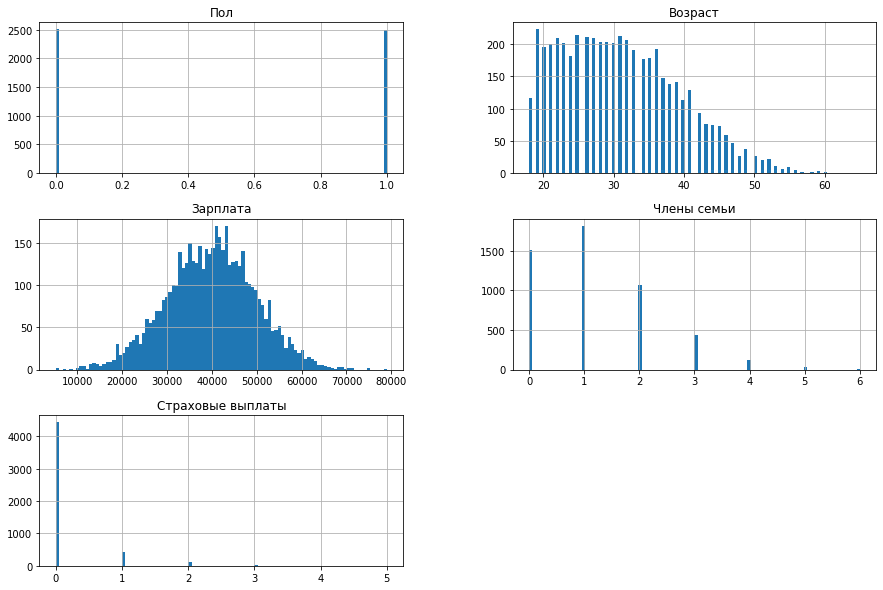

In [6]:
df.hist(bins=100, figsize=(15,10));

Поскольку пропусков в данных нет, следует проверить наличие в них полных дубликатов(параметр keep=False выводит оригиналы + дубликаты):

In [7]:
df.loc[df.duplicated(keep=False),:].sort_values(by=['Возраст', 'Зарплата'])

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
1566,1,18.0,39800.0,2,0
2429,1,18.0,39800.0,2,0
4053,1,19.0,31700.0,1,0
4726,1,19.0,31700.0,1,0
1336,1,19.0,32700.0,0,0
...,...,...,...,...,...
3365,1,41.0,47100.0,1,0
176,1,41.0,48900.0,0,0
3923,1,41.0,48900.0,0,0
361,0,50.0,24700.0,1,2


In [8]:
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


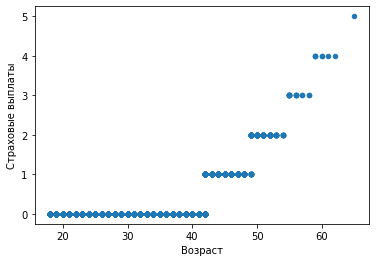

In [10]:
df.plot(x='Возраст', y='Страховые выплаты', kind='scatter');

### **Вывод**
- Данные успешно загружены, в них содержится 5000 строк и 5 столбцов;
- Данные в колонках соответствуют указанному в них типу, дополнительные преобразования в данных не требуются;
- 153 полных дубликата в данных удалены.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу?

**Ответ:** Не изменится

**Обоснование:**
У уравнениях проведём замену X -> XP, где P - обратимая квадратная матрица со случайными числами, в которой количество строк и столбцов соответствует количеству столбцов матрицы X.
Тогда необходимо убедиться, что при такой замене комплекс $X(X^T X)^{-1} X^T$ не изменится.
Для обоснования используем следующие свойства матриц:

$$
(AB)^T=B^TA^T;\newline
(AB)^{-1}=B^{-1}A^{-1};\newline
AA^{-1}=A^{-1}A=E;\newline
AE=EA=A,
$$
где E - единичная матрица.

С учётом подстановки перепишем:
$$
XP((XP)^T (XP))^{-1} (XP)^T
$$
Раскроем выражение в обратной матрице:
$$
XP(P^TX^TXP)^{-1} (XP)^T;\newline
XPP^{-1}(P^TX^TX)^{-1} P^TX^T;\newline
X E (X^TX)^{-1} (P^T)^{-1}P^T X^T;\newline
X (X^TX)^{-1} E X^T.
$$
Собирая множители посередине в произведение получаем:
$$
X(X^T X)^{-1} X^T.
$$
Что аналогично исходному выражению, содержащему X, значит формула обучения и предсказания не изменятся. ЧТД.

Теперь установим связь между параметрами линейной регрессии в исходной задаче и в преобразованной:

$$
a = X\omega=XP\omega_p=a_1;\newline
X^{-1}X\omega=X^{-1}XP\omega_p;\newline
\omega=P\omega_p;\newline
P^{-1}\omega=P^{-1}P\omega_p;\newline
\omega_p=P^{-1}\omega.
$$

Параметры линейной регрессии в исходной задаче и в преобразованной остаются связанными, поскольку умножение на Матрицу Р можно интерпретировать как ряд линейных преобразований со строками и столбцами матрицы А, соответственно эта операция обратима.

### **Вывод**

Доказано, что умножение признаков на обратимую матрицу не меняет качество линейной регрессии.

## Алгоритм преобразования

**Алгоритм**

В нашем случае преобразованная матрица должна быть такого же размера, что и исходная, поэтому n=k(матрица преобразования квадратная) с размерами 4x4.
Матрицу преобразования создадим средствами **numpy**, она будет представлять из себя матрицу 4x4 со случайными числами из нормального распределения.

Этапы алгоритма:

1. Составление матрицы B.
2. Проверка матрицы B на обратимость. Вычисление детерминанта матрицы .
3. Получение матрицы преобразованных признаков Xt = XB.

**Обоснование**

Правило для умножения матриц: 
$$
\underset{m\:\times\:k}{A}\cdot\underset{k\:\times\:n}{B}=\underset{m\:\times\:n}{C}, где
$$

m, k, n - размеры строк/столбцов соответствующих матриц.

Чтобы сохранить исходные размеры матрицы A, размеры матрицы B должны быть равны количеству столбцов матрицы A(кол-ву признаков), то есть k x k. Для того чтобы была возможность обратно воссоздать исходную матрицу, необходимо, чтобы матрица B была обратимой, то есть **detB** не равно 0. 

### **Вывод**

Сформулирован и обоснован алгоритм преобразования данных в зашифрованный вид.

## Проверка алгоритма

Проверим алгоритм на практике. Сначала необходимо отделить целевой признак от остальных:

In [11]:
y = df['Страховые выплаты']
X = df.drop('Страховые выплаты', axis=1)

Создаём обучающую и тестовую выборки, а также Pipeline, чтобы исключить утечку данных из тестовой выборки в обучающую.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=777)

In [13]:
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

Без обработки результаты выглядят следующим образом:

In [14]:
print(
    'R2 на обучающей выборке:',
    cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1).mean(),
    '\nR2 на тестовой выборке:',
    pipe.fit(X_train, y_train).score(X_test, y_test)
)

R2 на обучающей выборке: 0.432138083680238 
R2 на тестовой выборке: 0.4181486424656593


Теперь проверим данные с учётом шифрования. В соответствии с алгоритмом создадим невырожденную матрицу преобразования и проверим её на обратимость:

In [15]:
det = 0
while det == 0:
    transform_matrix = np.random.normal(size=(X.shape[1], X.shape[1]))
    det = np.linalg.det(transform_matrix)

In [16]:
print(np.linalg.det(transform_matrix))
transform_matrix

0.2562705591557422


array([[-0.33868169,  1.45008523, -0.63649627, -0.20053504],
       [-1.15571443,  1.12209982, -1.41387514, -0.92822764],
       [ 0.59592329, -1.01870427,  0.42942239,  0.62923912],
       [-0.13670901, -1.22912319, -1.91211611,  0.22272503]])

In [17]:
Xt = pd.DataFrame(
    X.values @ transform_matrix,
    index=X.index, columns=X.columns)
Xt

,Пол,Возраст,Зарплата,Члены семьи
0,29509.935546,-50481.504917,21238.832909,31172.225076
1,22591.785481,-38660.374929,16251.100339,23868.610712
2,12480.873390,-21360.248851,8976.867751,13187.102862
3,24825.457809,-42458.862360,17873.397934,26220.223862
4,15520.899206,-26555.312662,11167.699304,16396.950053
...,...,...,...,...
4842,21241.828063,-36338.782020,15286.966485,22438.291565
4843,31186.949443,-53343.181667,22451.749216,32940.792733
4844,20178.411854,-34514.091126,14525.317189,21313.086974
4845,19460.517086,-33289.180836,14004.633962,20556.165768


После того как мы убедились, что получили отличные от исходных данные аналогичным образом проверяем результаты:

In [18]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, y, test_size=.25, random_state=777)

In [19]:
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

In [20]:
print(
    'R2 на обучающей выборке c зашифрованными данными:',
    cross_val_score(pipe, Xt_train, yt_train, cv=5, n_jobs=-1).mean(),
    '\nR2 на тестовой выборке c зашифрованными данными:',
    pipe.fit(Xt_train, yt_train).score(Xt_test, yt_test)
)

R2 на обучающей выборке c зашифрованными данными: 0.43213808368021 
R2 на тестовой выборке c зашифрованными данными: 0.41814864246568473


Как можно заметить, результаты для старых и новых данных различаются крайне незначительно, незначительная разница присутствует лишь за счёт трудностей обработки чисел с плавающей точкой.

### **Вывод**

- Реализован алгоритм трансформации данных, проверена обратимость трансформирующей матрицы;
- Метрика проверена на моделях с исходными и преобразованными данными, существенной разницы между ними нет, что подтверждается выкладками, изложенными ранее.
- Различия имеют место быть, то есть разница не нулевая, а околонулевая в силу неточности обработки компьютера чисел с плавающей точкой.

## **Вывод**
В данной работе формируется алгоритм преобразования исходных данных с целью защиты персональных данных и сохранении качества результатов, получаемых с помощью модели. Получены следующие результаты:

- Исходные данные изучены, также выведены их метрики и распределения, удалены полные дубликаты;
- Доказано,что при умножении данных в матричном виде на обратимую матрицу результаты линейной регрессии не изменяются.
- Приведён и обоснован алгоритм для шифрования данных без изменения качества предсказаний;
- Алгоритм реализован на данных, с помощью линейной регрессии проверена метрика R2 на исходных и преобразованных данных. Существенных различий нет, разница обусловлена спецификой обработки компьютером чисел с плавающей точкой.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования